In [48]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [50]:
import warnings 
warnings.filterwarnings("ignore")

In [51]:
train=pd.read_csv("data/train_bike.csv", parse_dates=["datetime"])
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


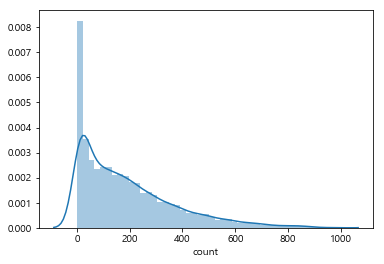

In [52]:
sns.distplot(train['count'])

In [53]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [54]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [55]:
train['datetime']
train['datetime'].dt.year

train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


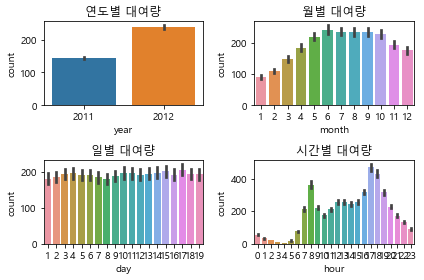

In [56]:
fig,((ax1, ax2), (ax3, ax4))=plt.subplots(2,2) #row:2, col:2
sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)
# 4개를 다 출력하면 합쳐지기 때문에 창을 나눠야 함

ax1.set(ylabel='count', title='연도별 대여량')
ax2.set(ylabel='count', title='월별 대여량')
ax3.set(ylabel='count', title='일별 대여량')
ax4.set(ylabel='count', title='시간별 대여량')

fig.tight_layout()

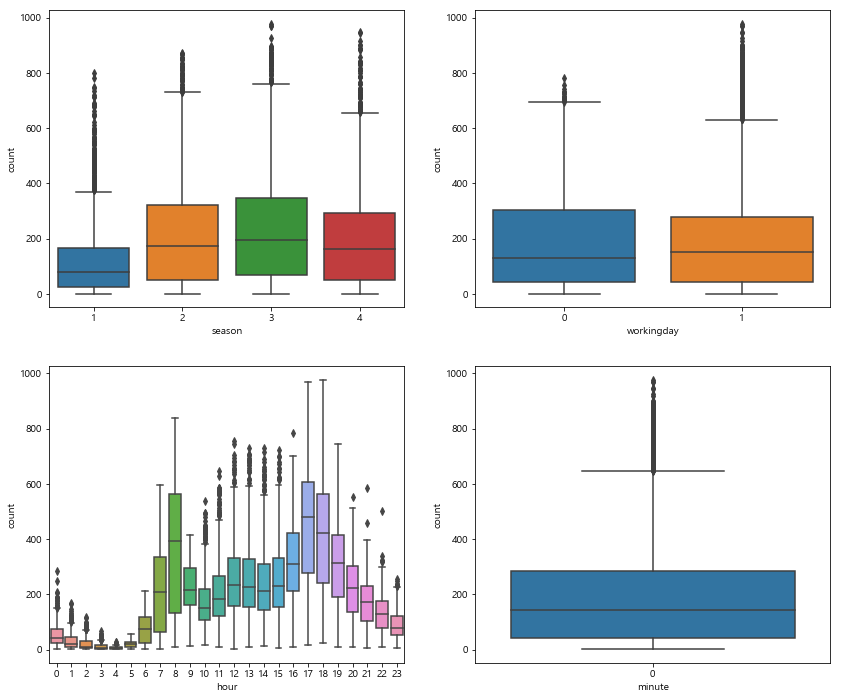

In [57]:
fig, axes=plt.subplots(2,2)
fig.set_size_inches(14,12)
sns.boxplot(data=train, y="count", x="season", ax=axes[0][0])
sns.boxplot(data=train, y="count", x="workingday", ax=axes[0][1])
sns.boxplot(data=train, y="count", x="hour", ax=axes[1][0])
sns.boxplot(data=train, y="count", x="minute", ax=axes[1][1])

In [58]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [59]:
train['dayofweek']=train['datetime'].dt.dayofweek
# 0~6:0=일요일, 6=토요일


In [60]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

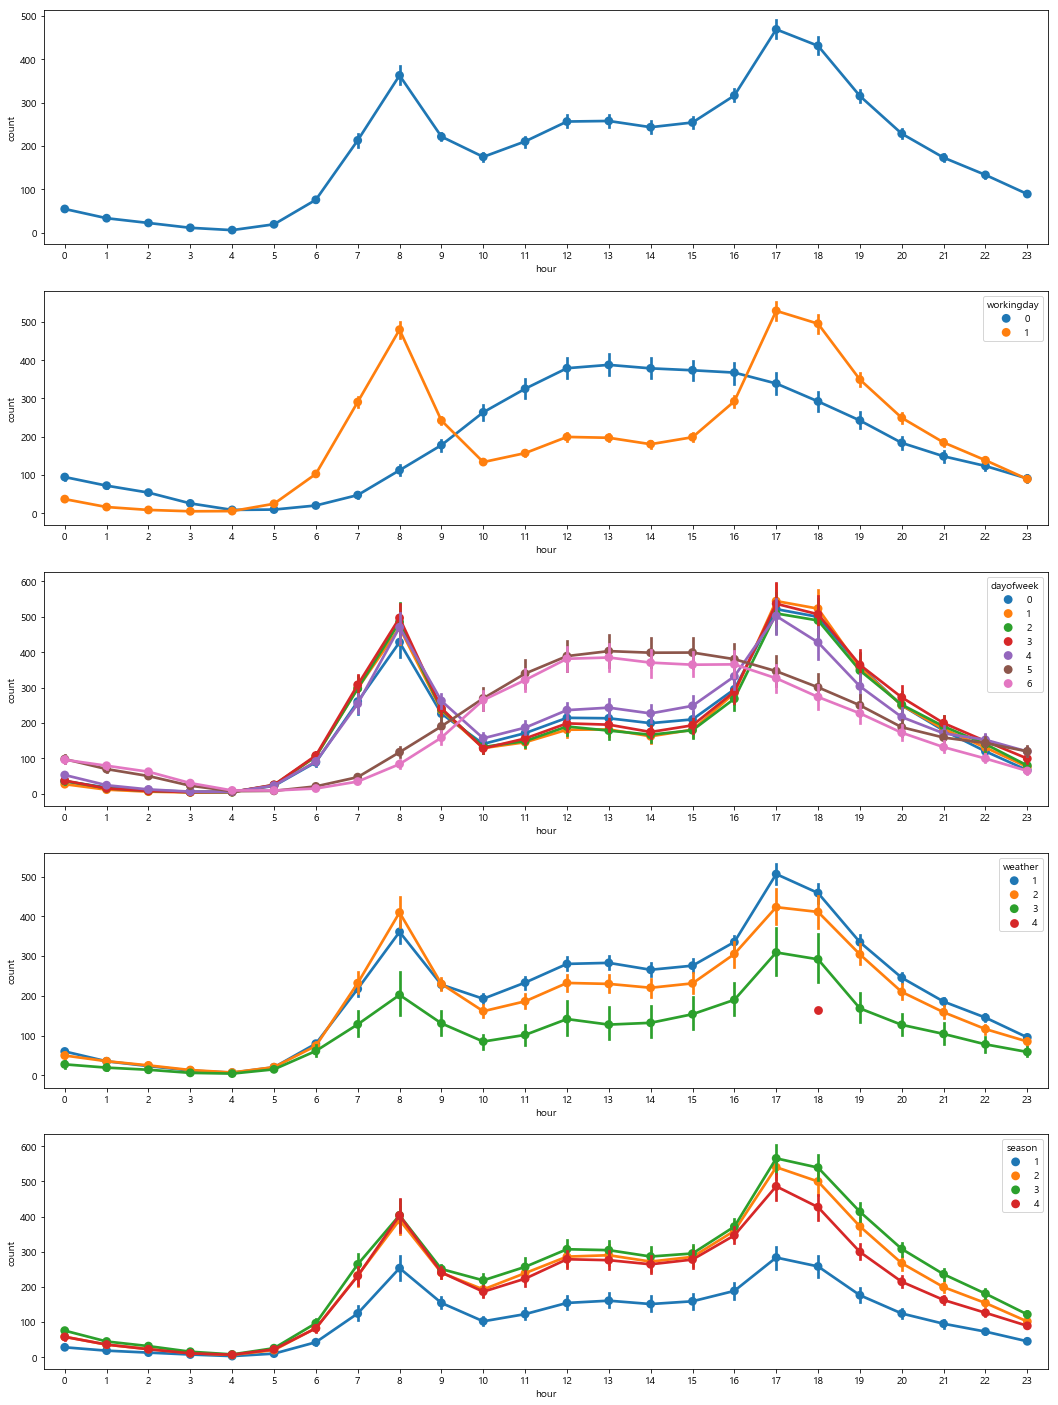

In [61]:
fig, ax=plt.subplots(5)
fig.set_size_inches(18,25)
sns.pointplot(data=train, x="hour", y="count", ax=ax[0])
sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax[1])
sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax[2])
sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax[3])
sns.pointplot(data=train, x="hour", y="count", hue="season", ax=ax[4])

In [62]:
group_season=train.groupby(['season'])['count'].sum() # count를 기준으로 season을 그룹화
group_season # 자전거 대여수의 합

season
1    312498
2    588282
3    640662
4    544034
Name: count, dtype: int64

In [63]:
# 상관계수
train.columns
corrMatt=train[['temp','atemp','casual','registered','humidity','windspeed', 'count']]
type(corrMatt)
corrMatt=corrMatt.corr()
corrMatt

,temp,atemp,casual,registered,humidity,windspeed,count
temp,1.000000,0.984948,0.467097,0.318571,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,0.462067,0.314635,-0.043536,-0.057473,0.389784
casual,0.467097,0.462067,1.000000,0.497250,-0.348187,0.092276,0.690414
registered,0.318571,0.314635,0.497250,1.000000,-0.265458,0.091052,0.970948
humidity,-0.064949,-0.043536,-0.348187,-0.265458,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,0.092276,0.091052,-0.318607,1.000000,0.101369
count,0.394454,0.389784,0.690414,0.970948,-0.317371,0.101369,1.000000


In [64]:
mask=np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False
mask

array([[ 0.        ,  0.98494811,  0.46709706,  0.31857128, -0.06494877,
        -0.01785201,  0.39445364],
       [ 0.        ,  0.        ,  0.46206654,  0.31463539, -0.04353571,
        -0.057473  ,  0.38978444],
       [ 0.        ,  0.        ,  0.        ,  0.49724969, -0.3481869 ,
         0.09227619,  0.69041357],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.26545787,
         0.09105166,  0.97094811],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.31860699, -0.31737148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.10136947],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

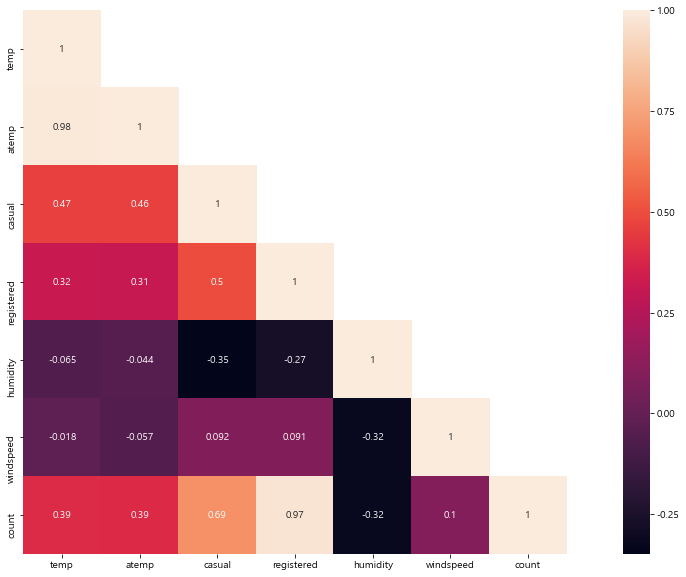

In [65]:
# sns.heatmap(corrMatt) #이렇게 하면 양쪽이 나옴. 한쪽만 출력하기 위해 마스크 옵션을 줌
fig,ax =plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask, square=True, annot=True)

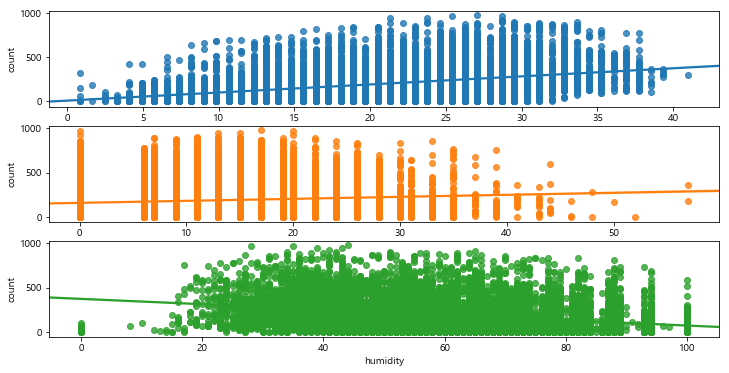

In [66]:
fig,ax=plt.subplots(3)
fig.set_size_inches(12,6)
sns.regplot(x="temp", y="count", data=train, ax=ax[0])
sns.regplot(x="windspeed", y="count", data=train, ax=ax[1])
sns.regplot(x="humidity", y="count", data=train, ax=ax[2])

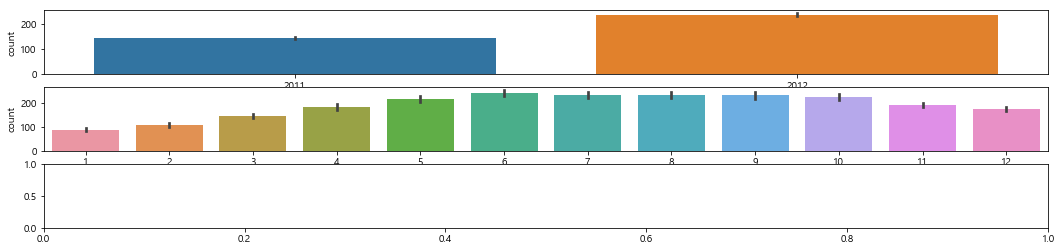

In [67]:
fig,ax=plt.subplots(3)
fig.set_size_inches(18,4)
sns.barplot(y="count", x="year", data=train, ax=ax[0])
sns.barplot(y="count", x="month", data=train, ax=ax[1])


#각 년도별(2011,2012) 월별 대여량 비교

In [68]:
def ym(datetime): #2011-01-01 00:00:00
    return "{0}-{1}".format(datetime.year, datetime.month) #"2011-01"

train["ym"]=train['datetime'].apply(ym)
train["ym"]

0         2011-1
1         2011-1
2         2011-1
3         2011-1
4         2011-1
5         2011-1
6         2011-1
7         2011-1
8         2011-1
9         2011-1
10        2011-1
11        2011-1
12        2011-1
13        2011-1
14        2011-1
15        2011-1
16        2011-1
17        2011-1
18        2011-1
19        2011-1
20        2011-1
21        2011-1
22        2011-1
23        2011-1
24        2011-1
25        2011-1
26        2011-1
27        2011-1
28        2011-1
29        2011-1
          ...   
10856    2012-12
10857    2012-12
10858    2012-12
10859    2012-12
10860    2012-12
10861    2012-12
10862    2012-12
10863    2012-12
10864    2012-12
10865    2012-12
10866    2012-12
10867    2012-12
10868    2012-12
10869    2012-12
10870    2012-12
10871    2012-12
10872    2012-12
10873    2012-12
10874    2012-12
10875    2012-12
10876    2012-12
10877    2012-12
10878    2012-12
10879    2012-12
10880    2012-12
10881    2012-12
10882    2012-12
10883    2012-

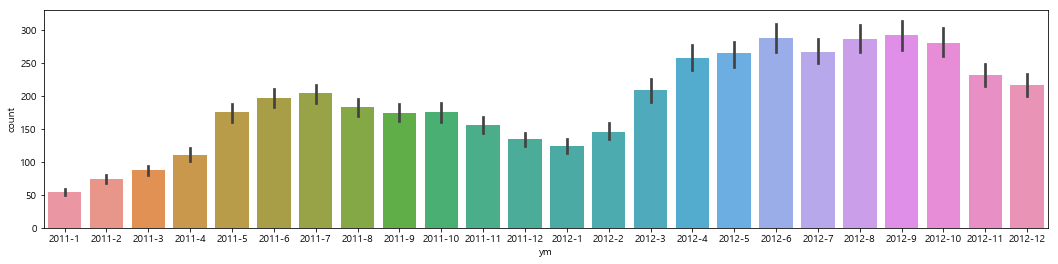

In [70]:
fig,ax=plt.subplots(1)
fig.set_size_inches(18,4)
sns.barplot(data=train, x="ym", y="count")